In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")
pd.options.plotting.backend = "plotly"

states = pd.read_csv('../input/daily-power-generation-in-india-20172020/State_Region_corrected.csv')
data = pd.read_csv("../input/daily-power-generation-in-india-20172020/file.csv")
data['Date'] = pd.to_datetime(data['Date'])

<p style="font-size:16px">India is the world's third largest producer and third largest consumer of electricity. The national electric grid in India has an installed capacity of 370.106 GW as of 31 March 2020. Renewable power plants, which also include large hydroelectric plants, constitute 35.86% of India's total installed capacity. During the 2018-19 fiscal year, the gross electricity generated by utilities in India was 1,372 TWh and the total electricity generation (utilities and non utilities) in the country was 1,547 TWh. The gross electricity consumption in 2018-19 was 1,181 kWh per capita. In 2015-16, electric energy consumption in agriculture was recorded as being the highest (17.89%) worldwide. The per capita electricity consumption is low compared to most other countries despite India having a low electricity tariff.</p>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4f/Electricity_generation_chart.jpg/440px-Electricity_generation_chart.jpg" height="900px" width="600px">

# Description of Data

The unit MU stands for Mega Unit i.e one million unit of electricity where one unit signifies one kilowatt hour.

In [2]:
#changing thermal generation values to numerical values

data['Thermal Generation Actual (in MU)'] = data['Thermal Generation Actual (in MU)'].str.replace(',','').astype('float')
data['Thermal Generation Estimated (in MU)'] = data['Thermal Generation Estimated (in MU)'].str.replace(',','').astype('float')

In [3]:
# description of data

data.describe()

,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
count,4635.000000,4635.000000,2781.000000,2781.000000,4635.000000,4635.000000
mean,602.311107,578.086434,36.993085,36.925868,71.496945,74.311400
std,382.631956,384.556749,15.996135,11.676400,71.171101,78.360818
min,12.340000,12.380000,0.000000,0.000000,0.000000,0.000000
25%,469.740000,433.300000,25.800000,30.190000,26.090000,22.915000
50%,615.280000,539.860000,30.720000,34.720000,46.260000,48.370000
75%,683.490000,673.505000,46.830000,42.900000,86.010000,95.745000
max,1395.970000,1442.380000,68.740000,76.640000,341.970000,397.380000


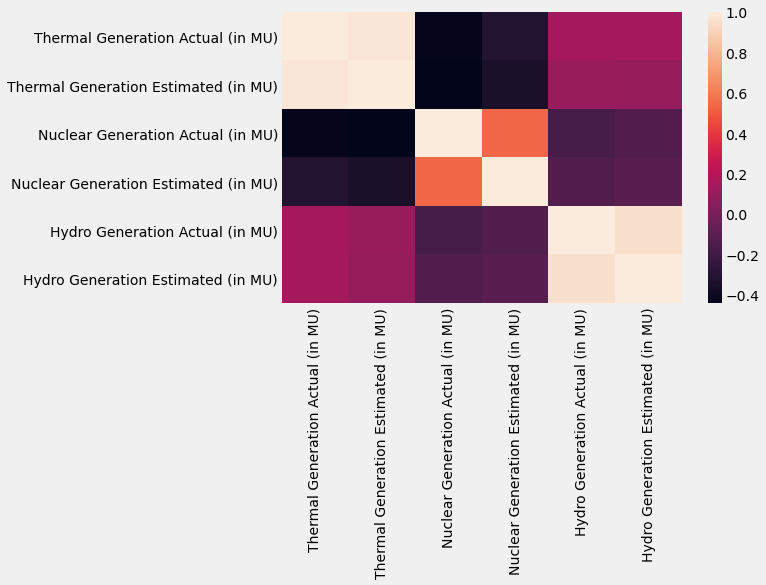

In [4]:
# correlation in the data

sns.heatmap(data.corr())

# Fixing missing values

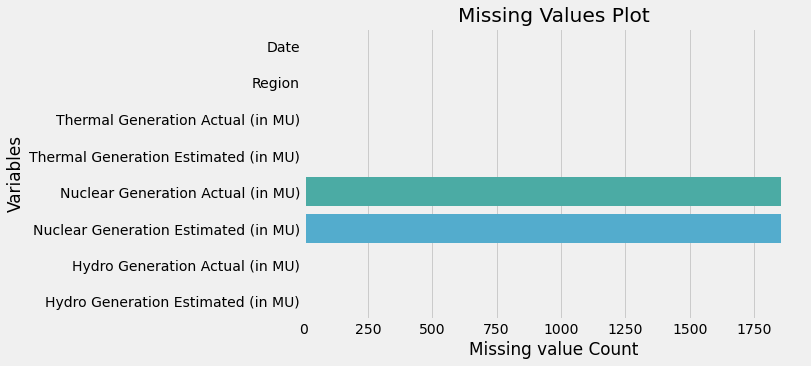

In [5]:
# checking for null values

plt.title('Missing Values Plot')
sns.barplot(data=data.isnull().sum().reset_index(), y='index', x=0)
plt.ylabel('Variables')
plt.title('Missing Values Plot')
plt.xlabel('Missing value Count')
plt.show()

Nuclear Generation is not done by many of the states and hence it can assumed that values which are missing are actually 0. 

And since the values are NaN in both the nuclear variables, both of the values can be replaced by 0.0

In [6]:
#filling the missing values

data = data.fillna(0.0)

In [7]:
# dropping duplicate values(if any)

data = data.drop_duplicates()

# Distribution and outliers

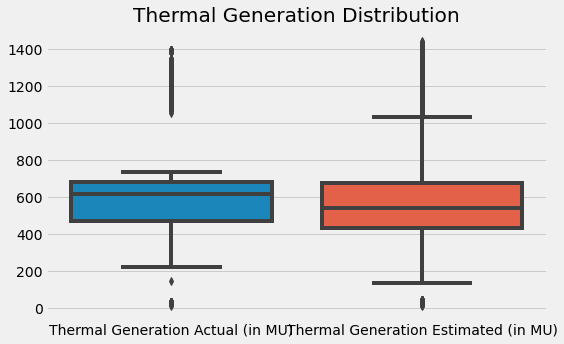

In [8]:
features = data.columns[2:].tolist()

sns.boxplot(data=data[features[:2]])
plt.title('Thermal Generation Distribution')
plt.show()

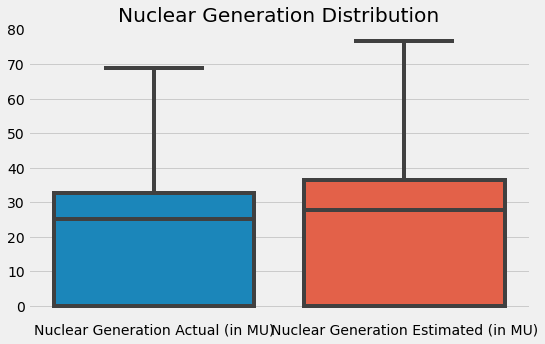

In [9]:
sns.boxplot(data=data[features[2:4]])
plt.title('Nuclear Generation Distribution')
plt.show()

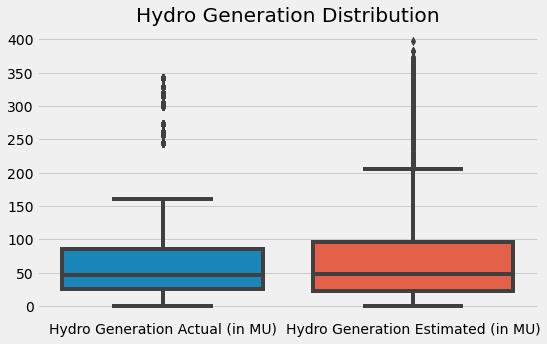

In [10]:
sns.boxplot(data=data[features[4:]])
plt.title('Hydro Generation Distribution')
plt.show()

Looking at the plot it seems that the hydro and thermal plots contain many outliers.

But I am assuming that most regions/or on most dates the generation ism't very high. So the most of the distribution came to be low.

And the places which produce the energy are getting treated as outliers.

The problem sn't happening with nuclear energy variables because it's values are already very low.

# Temporal distribution in northern region

In [11]:
df = data[data['Region']=='Northern']
fig = df.plot(x='Date',y=['Thermal Generation Actual (in MU)', 'Thermal Generation Estimated (in MU)'])
fig.update_layout(title="Thermal Generation in Northern Region",legend_orientation="h")

In [12]:
df = data[data['Region']=='Northern']
fig = df.plot(x='Date',y=['Nuclear Generation Actual (in MU)', 'Nuclear Generation Estimated (in MU)'])
fig.update_layout(title="Nuclear Generation in Northern Region",legend_orientation="h")

In [13]:
df = data[data['Region']=='Northern']
fig = df.plot(x='Date',y=['Hydro Generation Actual (in MU)', 'Hydro Generation Estimated (in MU)'])
fig.update_layout(title="Hydro Generation in Northern Region",legend_orientation="h")

Now this is an interesting graph that tells a story. Can you guess the story?

It is the story of the monsoon season. 

I am not completely sure of it but looking at the pattern in the data it seems that during the monsoon season the hydro power generation is much higher probably due to more water availability.

Let's check the distribution for southern region and check if the patterns in data similar and then will move on to the next step.

# Temporal Distribution in Southern Region

In [14]:
df = data[data['Region']=='Southern']
fig = df.plot(x='Date',y=['Thermal Generation Actual (in MU)', 'Thermal Generation Estimated (in MU)'])
fig.update_layout(title="Thermal Generation in Southern Region",legend_orientation="h")

In [15]:
df = data[data['Region']=='Southern']
fig = df.plot(x='Date',y=['Nuclear Generation Actual (in MU)', 'Nuclear Generation Estimated (in MU)'])
fig.update_layout(title="Nuclear Generation in Southern Region",legend_orientation="h")

In [16]:
df = data[data['Region']=='Southern']
fig = df.plot(x='Date',y=['Hydro Generation Actual (in MU)', 'Hydro Generation Estimated (in MU)'])
fig.update_layout(title="Hydro Generation in Southern Region",legend_orientation="h")

The hydro generation plot of southern region also shows similar characteristics but not as clearly as the northern region chart.

Also there is something very interesting to notice in common for all the above charts. 

During the September month of the year 2017 a huge fall was predicted for all the types of power generation. It's not just about a certain region or a certain power generation source. It is exactly true for all.

But the interesting fact is the fall did not happen as it was predicted. This signifies that there was some reason that comprised in estimating a fall but the reason was nullified in real.

In [17]:
df = states[['Area (km2)', 'Region']].copy()
df['Total_Area'] = df.groupby('Region')['Area (km2)'].transform('sum')
df.drop('Area (km2)', axis=1, inplace=True)
region_areas = df.drop_duplicates()
region_areas = region_areas[region_areas['Region']!='Central'].reset_index(drop=True)

# Power generation per unit area (MU/km2)

In [18]:
df = data.loc[data['Date'].dt.year==2017, ['Region','Thermal Generation Actual (in MU)','Nuclear Generation Actual (in MU)','Hydro Generation Actual (in MU)']].copy()

df[['Thermal','Nuclear','Hydro']] = df.groupby('Region')[['Thermal Generation Actual (in MU)','Nuclear Generation Actual (in MU)','Hydro Generation Actual (in MU)']].transform('sum')

df.drop(['Thermal Generation Actual (in MU)','Nuclear Generation Actual (in MU)','Hydro Generation Actual (in MU)'], axis=1,inplace=True)

df = df.drop_duplicates().reset_index(drop=True)
df['Area'] = region_areas['Total_Area']
df['Thermal per area'] = df['Thermal']/df['Area']
df['Nuclear per area'] = df['Nuclear']/df['Area']
df['Hydro per area'] = df['Hydro']/df['Area']

fig = df.plot(kind='bar', x='Region', y=['Thermal per area','Nuclear per area','Hydro per area'], barmode='group')
fig.update_layout(title="Power Generation per unit Area in 2017",legend_orientation="h")

In [19]:
df = data.loc[data['Date'].dt.year==2018, ['Region','Thermal Generation Actual (in MU)','Nuclear Generation Actual (in MU)','Hydro Generation Actual (in MU)']].copy()

df[['Thermal','Nuclear','Hydro']] = df.groupby('Region')[['Thermal Generation Actual (in MU)','Nuclear Generation Actual (in MU)','Hydro Generation Actual (in MU)']].transform('sum')

df.drop(['Thermal Generation Actual (in MU)','Nuclear Generation Actual (in MU)','Hydro Generation Actual (in MU)'], axis=1,inplace=True)

df = df.drop_duplicates().reset_index(drop=True)
df['Area'] = region_areas['Total_Area']
df['Thermal per area'] = df['Thermal']/df['Area']
df['Nuclear per area'] = df['Nuclear']/df['Area']
df['Hydro per area'] = df['Hydro']/df['Area']

fig = df.plot(kind='bar', x='Region', y=['Thermal per area','Nuclear per area','Hydro per area'], barmode='group')
fig.update_layout(title="Power Generation per unit Area in 2018",legend_orientation="h")

In [20]:
df = data.loc[data['Date'].dt.year==2019, ['Region','Thermal Generation Actual (in MU)','Nuclear Generation Actual (in MU)','Hydro Generation Actual (in MU)']].copy()

df[['Thermal','Nuclear','Hydro']] = df.groupby('Region')[['Thermal Generation Actual (in MU)','Nuclear Generation Actual (in MU)','Hydro Generation Actual (in MU)']].transform('sum')

df.drop(['Thermal Generation Actual (in MU)','Nuclear Generation Actual (in MU)','Hydro Generation Actual (in MU)'], axis=1,inplace=True)

df = df.drop_duplicates().reset_index(drop=True)
df['Area'] = region_areas['Total_Area']
df['Thermal per area'] = df['Thermal']/df['Area']
df['Nuclear per area'] = df['Nuclear']/df['Area']
df['Hydro per area'] = df['Hydro']/df['Area']

fig = df.plot(kind='bar', x='Region', y=['Thermal per area','Nuclear per area','Hydro per area'], barmode='group')
fig.update_layout(title="Power Generation per unit Area in 2019",legend_orientation="h")

In [21]:
df = data.loc[data['Date'].dt.year==2020, ['Region','Thermal Generation Actual (in MU)','Nuclear Generation Actual (in MU)','Hydro Generation Actual (in MU)']].copy()

df[['Thermal','Nuclear','Hydro']] = df.groupby('Region')[['Thermal Generation Actual (in MU)','Nuclear Generation Actual (in MU)','Hydro Generation Actual (in MU)']].transform('sum')

df.drop(['Thermal Generation Actual (in MU)','Nuclear Generation Actual (in MU)','Hydro Generation Actual (in MU)'], axis=1,inplace=True)

df = df.drop_duplicates().reset_index(drop=True)
df['Area'] = region_areas['Total_Area']
df['Thermal per area'] = df['Thermal']/df['Area']
df['Nuclear per area'] = df['Nuclear']/df['Area']
df['Hydro per area'] = df['Hydro']/df['Area']

fig = df.plot(kind='bar', x='Region', y=['Thermal per area','Nuclear per area','Hydro per area'], barmode='group')
fig.update_layout(title="Power Generation per unit Area in 2020",legend_orientation="h")

I don't think anything else is left to be analyzed from this dataset. So for now I will stop here. Will update the notebook f something new comes up.

Do leave an upvote if you like it.